In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

In [2]:
import sentencepiece as spm

In [4]:
sp = spm.SentencePieceProcessor()
sp.Load("uniparc_5M.model")

True

In [7]:
with open("sequences_train_subset.txt", "r+") as f:
    line = f.readline().strip()

In [8]:
print(line)
len(line)

MAKRKGKTYLSVLILVLIAILIFFISRLSIFEKNTPQILMPDVVYTDLKKPILVHVKDDESSIKNVQIILHKDDNTSAMVIADEKISNLKDITLQVALPKFGYKENVKSFVLEVIAKDSSFWNFFSGNEARKQIAVLVDNTAPKINIISNSYQIEQGGAGAVVFKADDANLDKVYIETNKGKIFKATPYVKEGYYAALIAWDARDEEFRAFVIATDKAGNISKERIRYYFVNRKYRVSNINLTDKFLDGKIENLANQYAPKDNNLNRYEKFKFVNETLRNSNEKLIHEITSKVPEEKIDNFDLNLFLPLKNGMKVADFADHRYYSYNGQFVSDSYHMGLDLASVAQAPIISNNAGKVVFAAENGIYGLNLIVYHGFGVYSLYGHCSSKNVDLDEMINKQSIIGKTGTSGLALGDHLHFGVLVQGVETRPEQWQDKKWIENNIYNVLNDGKKIILGKN


457

In [9]:
len(sp.EncodeAsPieces(line + '</s>'))

138

In [10]:
sp.DecodeIds(sp.EncodeAsIds(line)) == line

True

In [11]:
lens_2 = np.array([len(sp.SampleEncodeAsIds(line, -1, 0.2)) for x in range(1000)])
lens_5 = np.array([len(sp.SampleEncodeAsIds(line, -1, 0.5)) for x in range(1000)])

(array([  7.,  34.,  72., 171., 205., 255., 154.,  60.,  32.,  10.]),
 array([182. , 185.6, 189.2, 192.8, 196.4, 200. , 203.6, 207.2, 210.8,
        214.4, 218. ]),
 <a list of 10 Patch objects>)

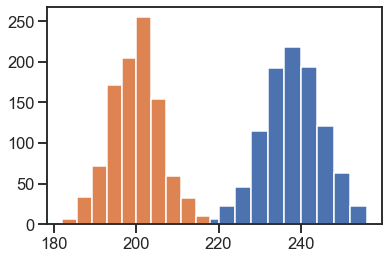

In [12]:
plt.hist(lens_2)
plt.hist(lens_5)